In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('dark_background')

In [28]:
df  = pd.read_csv('FlightCSV/AirPassengers.csv')

In [29]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [30]:
df = df.rename(columns={'#Passengers': 'Passengers'})

In [31]:
#CHanging datatypes to datetime
df['Month'] = pd.to_datetime(df['Month'])
print(df.dtypes)

Month         datetime64[ns]
Passengers             int64
dtype: object


In [32]:
#Changing index column as month
df.set_index('Month',inplace=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<AxesSubplot:xlabel='Month'>

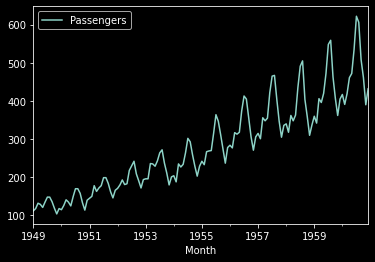

In [33]:
df.plot()

## IS the data Stationary??

In [34]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(df)

#non stationaryy

(0.01, False)

## DICKEY_FULLER Test

In [35]:
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag_,nobs_,critical_values_,icbest_ = adfuller(df)
print("pvalue is  :",pvalue, "if above 0.05,data is not stationary")

#Since data is not stationary, we may need SARIMA and not just ARIMA

pvalue is  : 0.9918802434376411 if above 0.05,data is not stationary


## Extract and plot trend, seasonal and residuals.

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df['Passengers'],
                            model='additive')

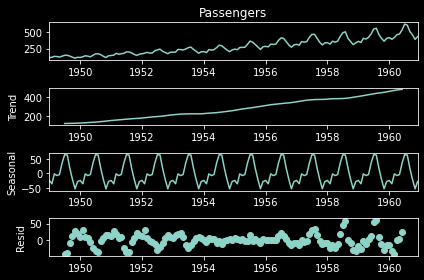

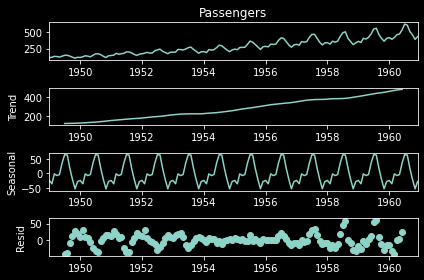

In [37]:
decomposed.plot()

In [38]:
trend = decomposed.trend
trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [39]:
seasonal = decomposed.seasonal
seasonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [40]:
residual = decomposed.resid
residual

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

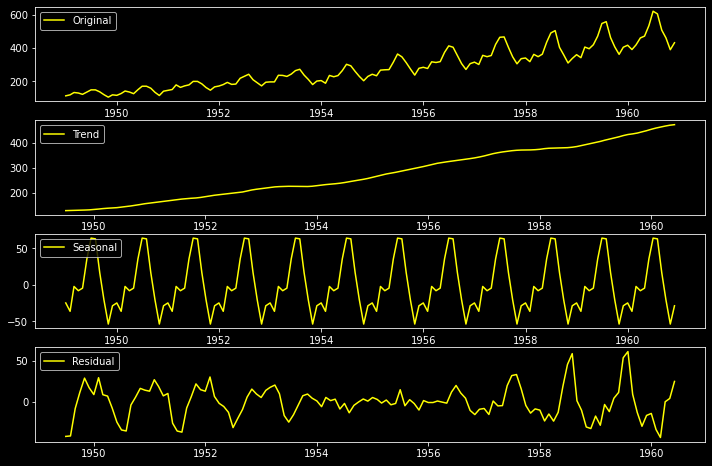

In [41]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df, label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()

### We can go through the exercise of making the data stationary and performing ARIMA
### Or let auto_arima provide the best model (e.g. SARIMA) and parameters. 
- Auto arima suggests best model and parameters based on AIC metric (relative quality of statistical models)

In [42]:
from pmdarima.arima import auto_arima
#Autoarima gives us best model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
arima_model = auto_arima(df['Passengers'], start_p = 1, d=1, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=5, m = 12, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.07 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.24 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1020.582, Time=0.54 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.87 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.31 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=3.33 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.18 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.34 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.47 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.26 sec
 ARIMA(0,1,1)(1,1,0)[12]     

In [43]:
print(arima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Mon, 10 May 2021   AIC                           1019.178
Time:                                     12:38:46   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      

### SPLITTING INTO TRAINING AND TEST SET

In [44]:
size = int(len(df)*0.66)
X_train,X_test = df[0:size],df[size:len(df)]

In [45]:
print(X_train)

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1956-07-01         413
1956-08-01         405
1956-09-01         355
1956-10-01         306
1956-11-01         271

[95 rows x 1 columns]


In [46]:
print(X_test)

            Passengers
Month                 
1956-12-01         306
1957-01-01         315
1957-02-01         301
1957-03-01         356
1957-04-01         348
1957-05-01         355
1957-06-01         422
1957-07-01         465
1957-08-01         467
1957-09-01         404
1957-10-01         347
1957-11-01         305
1957-12-01         336
1958-01-01         340
1958-02-01         318
1958-03-01         362
1958-04-01         348
1958-05-01         363
1958-06-01         435
1958-07-01         491
1958-08-01         505
1958-09-01         404
1958-10-01         359
1958-11-01         310
1958-12-01         337
1959-01-01         360
1959-02-01         342
1959-03-01         406
1959-04-01         396
1959-05-01         420
1959-06-01         472
1959-07-01         548
1959-08-01         559
1959-09-01         463
1959-10-01         407
1959-11-01         362
1959-12-01         405
1960-01-01         417
1960-02-01         391
1960-03-01         419
1960-04-01         461
1960-05-01 

In [61]:
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(X_train['Passengers'],order=(0,1,1),seasonal_order=(2,1,1,12))

result = model.fit()
result.summary()

C:\Users\Sumit\anaconda3\envs\cv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sumit\anaconda3\envs\cv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   95
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -300.269
Date:                            Mon, 10 May 2021   AIC                            610.538
Time:                                    12:44:48   BIC                            622.571
Sample:                                01-01-1949   HQIC                           615.369
                                     - 11-01-1956                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3202      0.102     -3.141      0.002      -0.520      -0.120
ar.S.L12       0.6838      0.654      1.046      0.296      -0.598       1.965
ar.S.L24       0.3150      0.133      2.374      0.018       0.055       0.575
ma.S.L12      -0.9805      5.673     -0.173      0.863     -12.100      10.139
sigma2        78.6727    394.629      0.199      0.842    -694.785     852.131
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.95   Prob(JB):                         0.28
Heteroskedasticity (H):               1.69   Skew:                             0.42
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Train Prediction

In [67]:
start_index = 0
end_index = len(X_train)-1
train_prediction = result.predict(start_index,end_index)
print("train_prediction",train_prediction)
print("Original_X_train",X_train)

#One value got shifted in predicted because of p,d,q value

train_prediction 1949-01-01      0.000000
1949-02-01    111.998298
1949-03-01    117.999818
1949-04-01    131.999574
1949-05-01    129.000091
                 ...    
1956-07-01    419.522513
1956-08-01    398.690284
1956-09-01    365.419857
1956-10-01    320.682789
1956-11-01    274.838209
Freq: MS, Name: predicted_mean, Length: 95, dtype: float64
Original_X_train             Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1956-07-01         413
1956-08-01         405
1956-09-01         355
1956-10-01         306
1956-11-01         271

[95 rows x 1 columns]


## TEST PREDICTION

In [89]:
start_index = len(X_train)
end_index = len(df)-1
test_prediction = result.predict(start_index,end_index).rename('Predicted Passengers')

In [90]:
print(test_prediction)
print(X_test)

1956-12-01    311.103253
1957-01-01    320.261393
1957-02-01    310.939523
1957-03-01    351.847337
1957-04-01    349.876798
1957-05-01    355.055994
1957-06-01    411.866596
1957-07-01    457.075391
1957-08-01    445.060632
1957-09-01    395.819141
1957-10-01    347.111355
1957-11-01    309.227663
1957-12-01    352.323182
1958-01-01    361.435865
1958-02-01    351.156337
1958-03-01    394.574813
1958-04-01    392.102042
1958-05-01    398.663715
1958-06-01    459.493441
1958-07-01    505.797776
1958-08-01    493.872714
1958-09-01    440.425067
1958-10-01    388.452232
1958-11-01    349.226724
1958-12-01    394.085811
1959-01-01    404.162184
1959-02-01    392.496475
1959-03-01    437.917624
1959-04-01    435.740694
1959-05-01    443.304113
1959-06-01    507.137338
1959-07-01    556.146462
1959-08-01    543.018136
1959-09-01    486.933353
1959-10-01    432.820009
1959-11-01    391.768677
1959-12-01    438.776169
1960-01-01    449.497170
1960-02-01    436.581978
1960-03-01    484.163326


<AxesSubplot:xlabel='Month'>

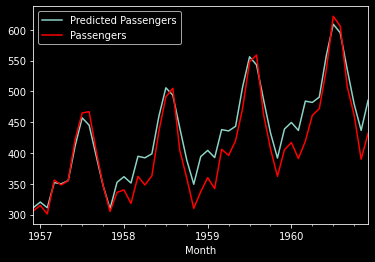

In [91]:
test_prediction.plot(legend=True)
X_test['Passengers'].plot(legend=True,color='red')

In [ ]:
#CAlculating MSE and rmse

In [88]:
import math
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(X_train,train_prediction)
print("mse_train",mse_train)
trainscore = math.sqrt(mean_squared_error(X_train,train_prediction))
print('Train Score: %2f RMSE' %(trainscore))

mse_train 260.58744552405847
Train Score: 16.142721 RMSE


In [95]:
testscore = math.sqrt(mean_squared_error(X_test,test_prediction))
print("Test score: %.2f RMSE"%(testscore))

Test score: 29.47 RMSE


In [102]:
# from sklearn.metrics import r2_score
# score = r2_score(X_test, prediction)
# print("R2 score is: ", score)
len(df)

144

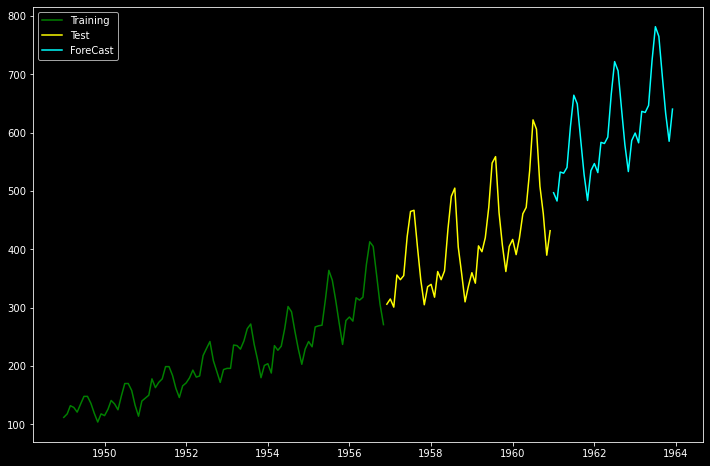

In [107]:
#predicting result for next 3 years


forecast = result.predict(start = len(df),  
                          end = (len(df)-1) + 3 * 12,  
                          typ = 'levels').rename('Forecast') 

plt.figure(figsize=(12,8))
plt.plot(X_train,label='Training',color='green')
plt.plot(X_test,label='Test',color='yellow')
plt.plot(forecast,label='ForeCast',color='cyan')
plt.legend()
plt.show()

In [ ]:
! git add Flight_sarimax.ipynb
! git commit -m "13:08/10-05-2021"
! git push origin main